In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2020-07-11 03:53:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  67.6MB/s    in 1.0s    

2020-07-11 03:53:49 (67.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [4]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [6]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))

1000
1000


In [7]:
base_dir ='/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

# directory with training cat pictures
train_cat_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [8]:
# filenames
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

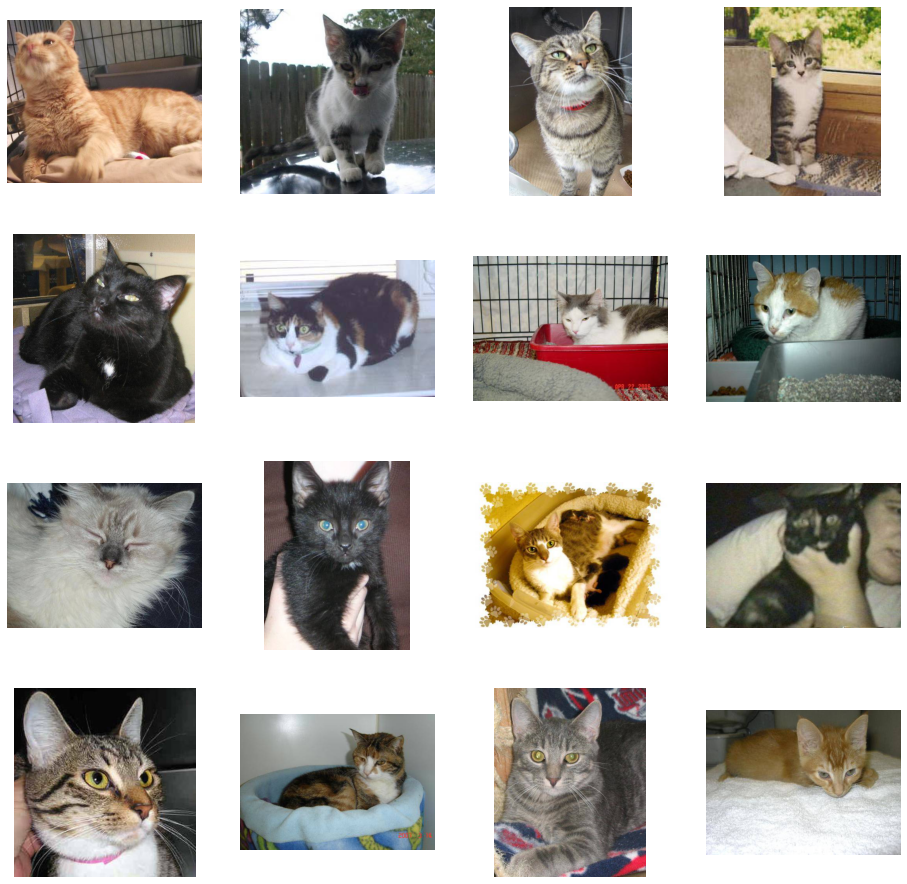

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1  #plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j +=1

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./225)
val_datagen = ImageDataGenerator(rescale=1./225)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
train_generator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(20, 150, 150, 3)
(20,)


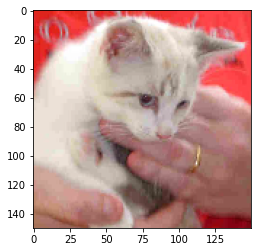

In [14]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

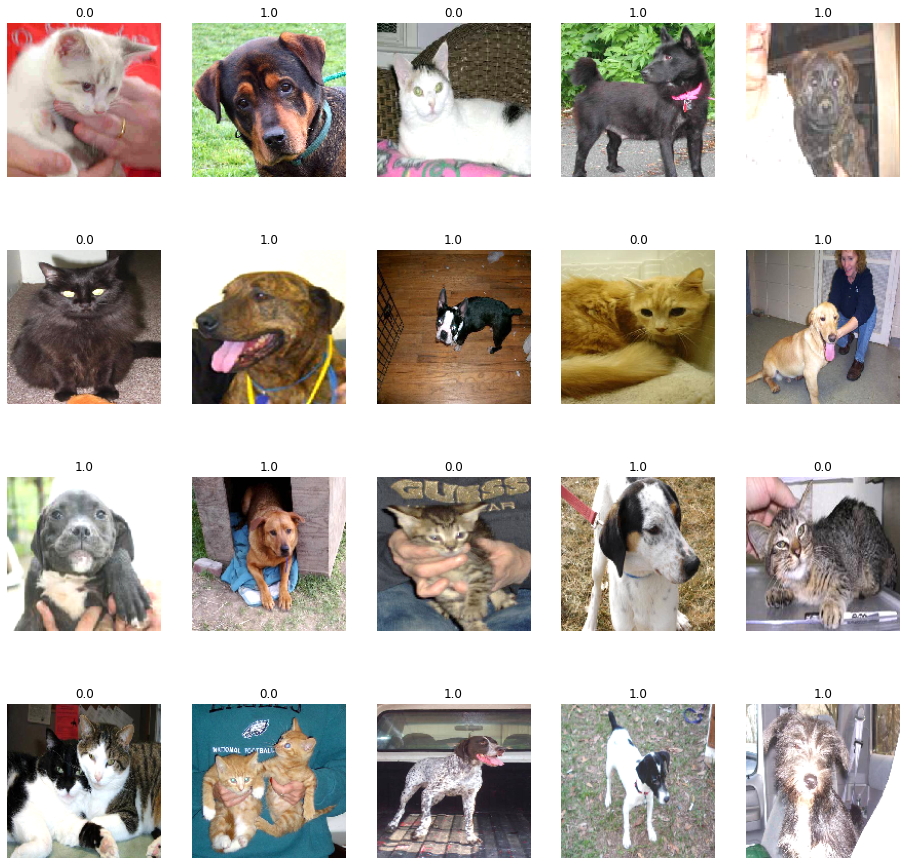

In [18]:

plt.figure(figsize=(16,16))
pos = 1  #plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])

  plt.axis('off')
  pos +=1

BUILD THE MODEL

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [21]:
model = Sequential()
# add a conv layer by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# add a conv layer by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# add a conv layer by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))

#convert the featuremap into 1D array
model.add(Flatten())
#fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [28]:
## compiling the model
import tensorflow as tf
model.compile(loss='BinaryCrossentropy',metrics=['accuracy'])

TRAIN THE MODEL

In [29]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)


Epoch 1/15
100/100 [==============================] - 10s 104ms/step - loss: 0.8013 - accuracy: 0.5580 - val_loss: 0.6445 - val_accuracy: 0.6620
Epoch 2/15
100/100 [==============================] - 10s 103ms/step - loss: 0.6336 - accuracy: 0.6495 - val_loss: 0.6031 - val_accuracy: 0.6740
Epoch 3/15
100/100 [==============================] - 10s 105ms/step - loss: 0.5441 - accuracy: 0.7390 - val_loss: 0.5968 - val_accuracy: 0.7040
Epoch 4/15
100/100 [==============================] - 10s 104ms/step - loss: 0.4784 - accuracy: 0.7595 - val_loss: 0.6569 - val_accuracy: 0.6570
Epoch 5/15
100/100 [==============================] - 10s 102ms/step - loss: 0.3951 - accuracy: 0.8165 - val_loss: 0.5668 - val_accuracy: 0.7310
Epoch 6/15
100/100 [==============================] - 10s 102ms/step - loss: 0.3198 - accuracy: 0.8605 - val_loss: 0.6279 - val_accuracy: 0.7430
Epoch 7/15
100/100 [==============================] - 10s 102ms/step - loss: 0.2375 - accuracy: 0.9020 - val_loss: 0.7251 - val_ac

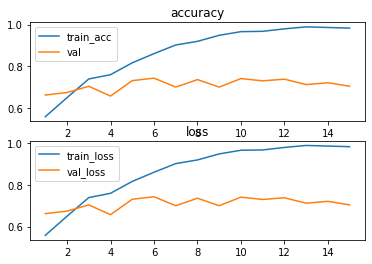

In [31]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_acc,label='train_loss')
plt.plot(epochs,val_acc,label='val_loss')
plt.title('loss')
plt.legend()

To predict for an image
1.read the image
2.check the shape

3.resize into required shape
4.apply scaling

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
image.load_img('/tmp/dog.jpg')
print(type(img))

img=tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img.tf.image.resize(img,(150,150))
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img)